In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
import joblib

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [4, 4]


# import and combine data
- We will make model on test data only so we need only rows for which consumption is given for next three months

In [2]:
demographicsFE = pd.read_csv('FE/demographics_cleaned.csv')
behaviorFE = pd.read_csv('FE/behavior_cleaned.csv')
consumption = pd.read_csv('FE/consumption_withQN.csv')

In [3]:
df_Spend = pd.merge(consumption, behaviorFE, how='left', on='ID', suffixes=('', ''))
df_Spend = pd.merge(df_Spend, demographicsFE, how='left', on='ID')
df_Spend = df_Spend.dropna(axis=0)
df_Spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14463 non-null  int64  
 1   cc_cons                       14463 non-null  float64
 2   cc_cons_quantileTransformed   14463 non-null  float64
 3   card_lim                      14463 non-null  int64  
 4   trading                       14463 non-null  float64
 5   CDs                           14463 non-null  float64
 6   LifeInsurance                 14463 non-null  float64
 7   emi_active                    14463 non-null  float64
 8   sum_cc_cons                   14463 non-null  float64
 9   sum_dc_cons                   14463 non-null  float64
 10  sum_cc_count                  14463 non-null  float64
 11  sum_dc_count                  14463 non-null  int64  
 12  sum_debit_amount              14463 non-null  float64
 13  sum_cr

In [4]:
cols_to_logScale = ['card_lim','trading','CDs','LifeInsurance','emi_active','sum_cc_cons','sum_dc_cons',
                    'sum_cc_count','sum_dc_count','sum_debit_amount','sum_credit_amount','sum_debit_count',
                    'sum_credit_count','MAX_credit_amount','Neg_GeneralInsurance','Pos_GeneralInsurance']
df_Spend_prepare = df_Spend.copy()

for cols in cols_to_logScale:
    df_Spend_prepare[cols] = np.log(df_Spend[cols]+1)

## need to see the effect of log scaling

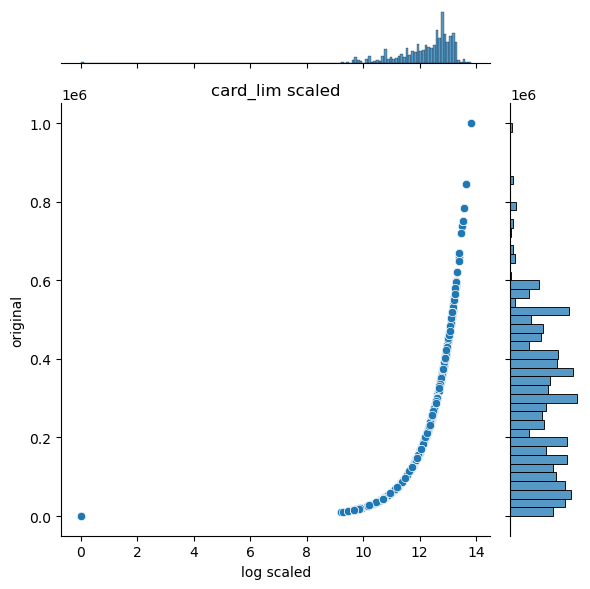

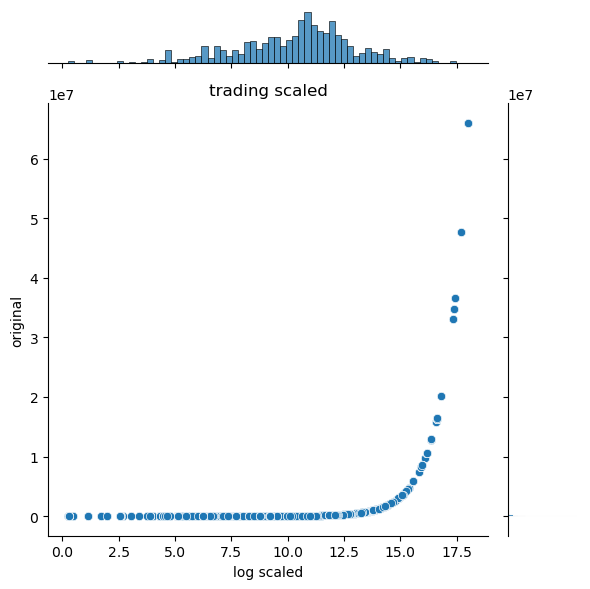

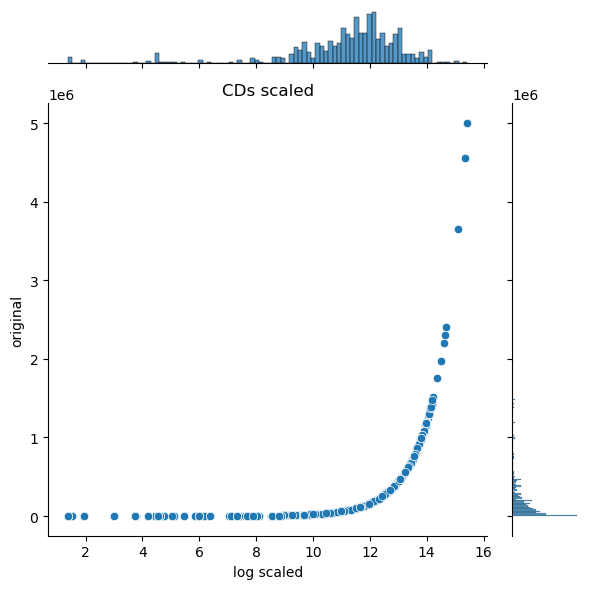

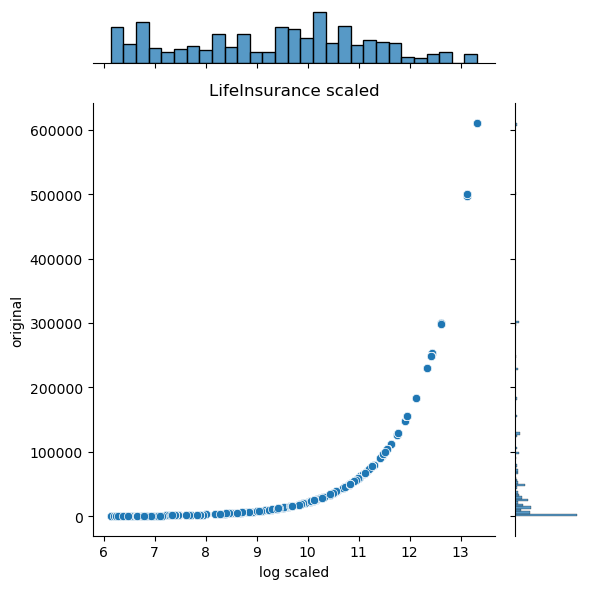

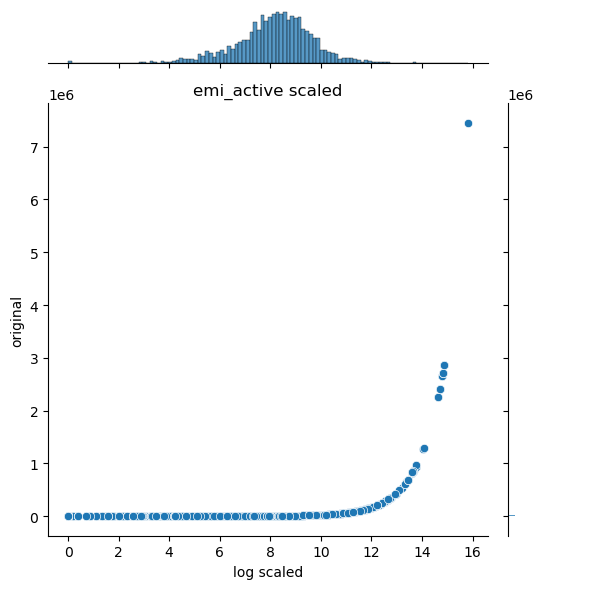

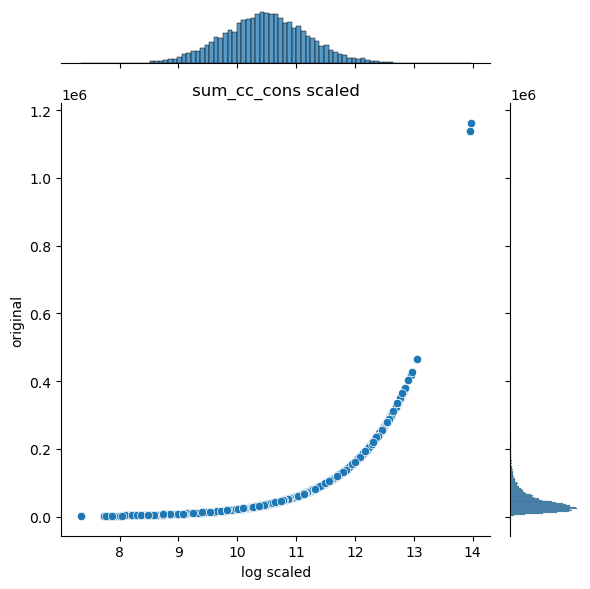

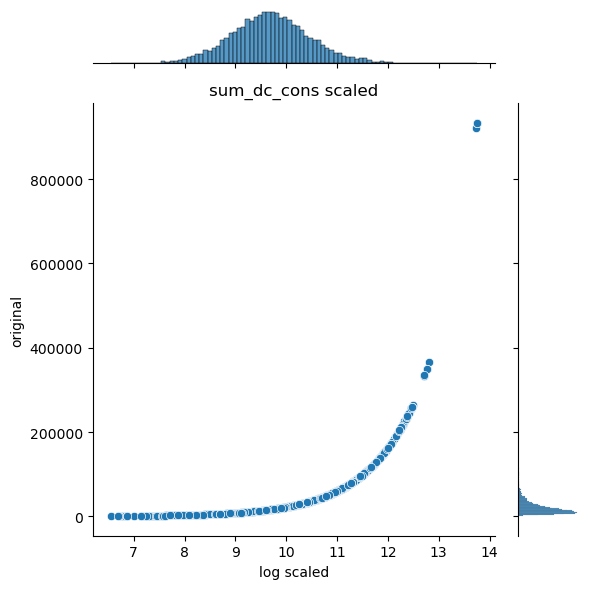

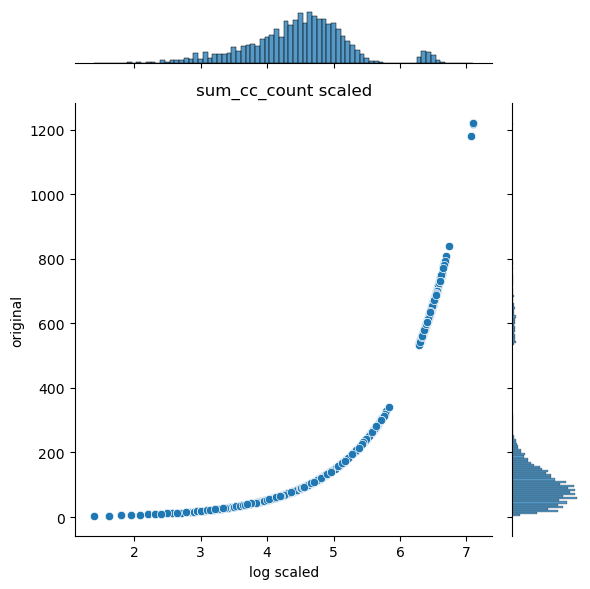

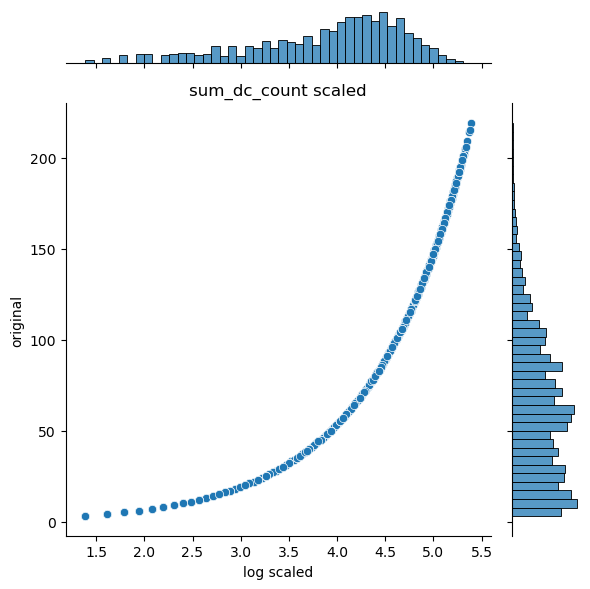

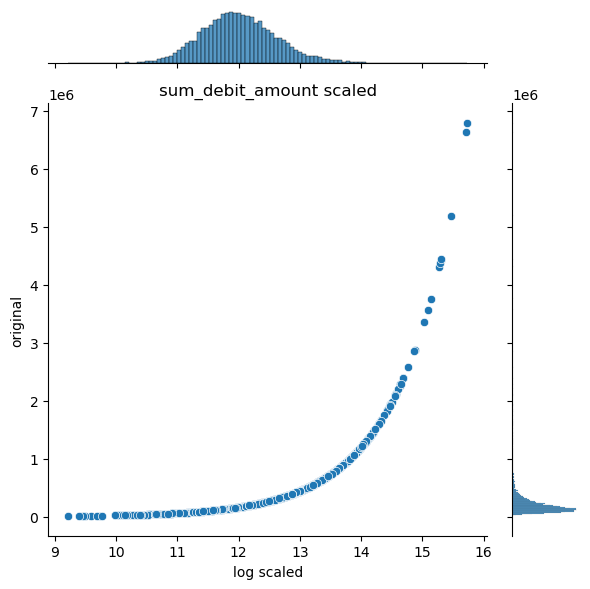

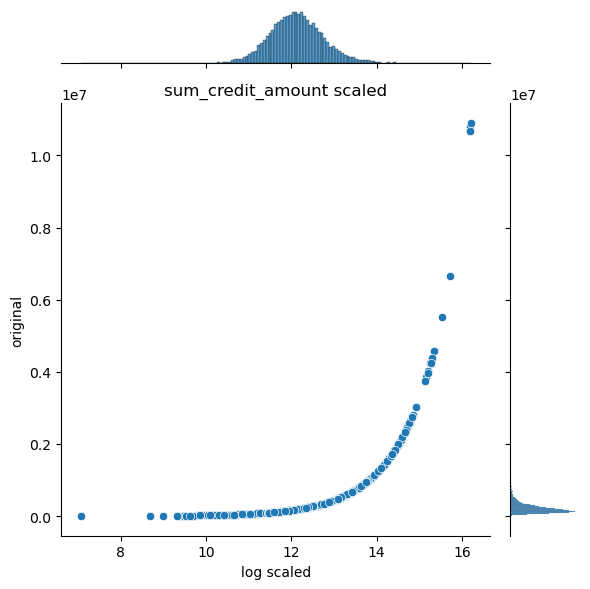

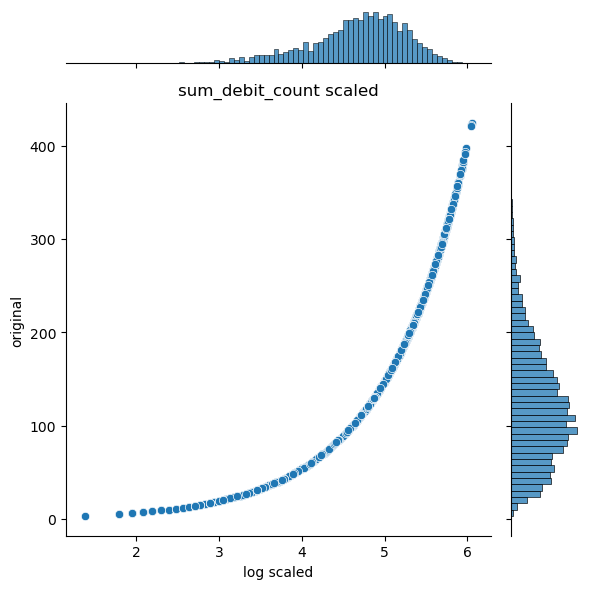

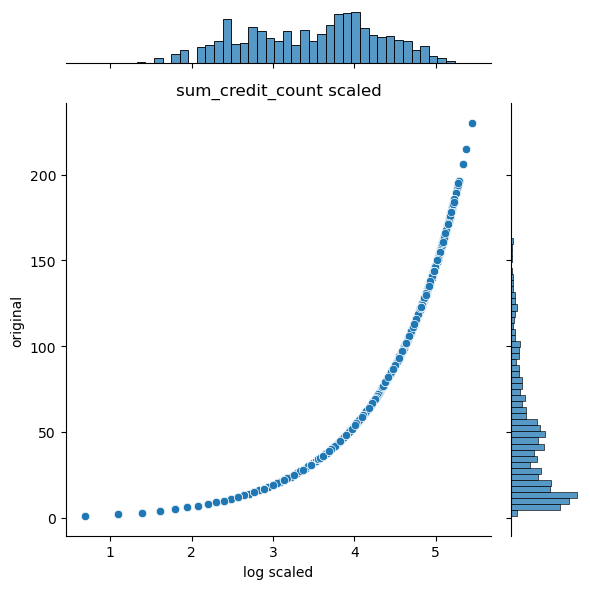

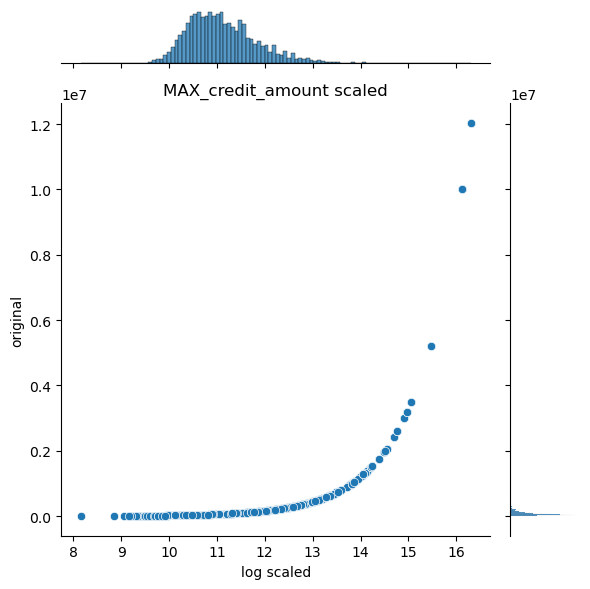

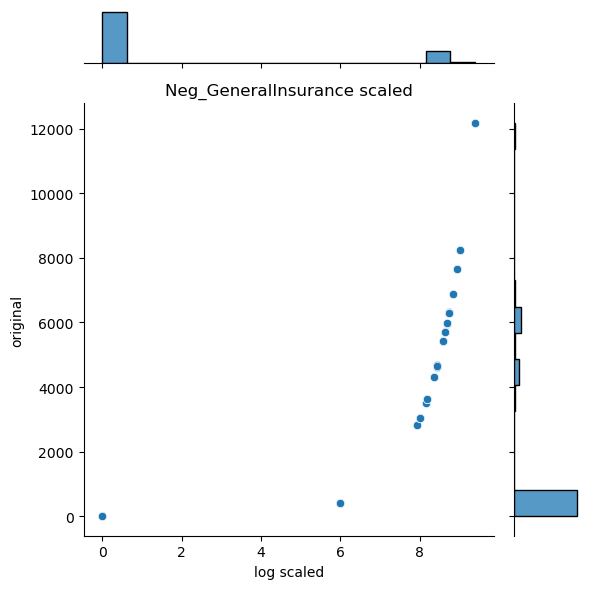

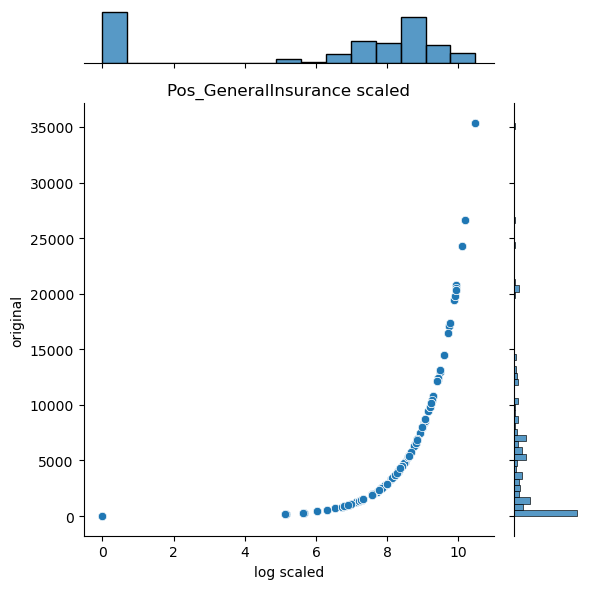

In [5]:
for i, col in enumerate(cols_to_logScale):
    sns.jointplot(x=df_Spend_prepare[col],y=df_Spend[col])
    plt.ylabel("original")
    plt.xlabel("log scaled")
    plt.title(f"{col} scaled")
    plt.tight_layout()
    plt.show()

In [6]:
## standard scale all numeric features
df_Spend_prepare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14463 non-null  int64  
 1   cc_cons                       14463 non-null  float64
 2   cc_cons_quantileTransformed   14463 non-null  float64
 3   card_lim                      14463 non-null  float64
 4   trading                       14463 non-null  float64
 5   CDs                           14463 non-null  float64
 6   LifeInsurance                 14463 non-null  float64
 7   emi_active                    14463 non-null  float64
 8   sum_cc_cons                   14463 non-null  float64
 9   sum_dc_cons                   14463 non-null  float64
 10  sum_cc_count                  14463 non-null  float64
 11  sum_dc_count                  14463 non-null  float64
 12  sum_debit_amount              14463 non-null  float64
 13  sum_cr

In [7]:
other_numeric_cols = ['Emp_Tenure_Years','Tenure_with_Bank', 'Avg_days_between_transaction', 'FE_age_noOutlierErrors']
numeric_cols_toScale = other_numeric_cols+cols_to_logScale
numeric_cols_toScale

['Emp_Tenure_Years',
 'Tenure_with_Bank',
 'Avg_days_between_transaction',
 'FE_age_noOutlierErrors',
 'card_lim',
 'trading',
 'CDs',
 'LifeInsurance',
 'emi_active',
 'sum_cc_cons',
 'sum_dc_cons',
 'sum_cc_count',
 'sum_dc_count',
 'sum_debit_amount',
 'sum_credit_amount',
 'sum_debit_count',
 'sum_credit_count',
 'MAX_credit_amount',
 'Neg_GeneralInsurance',
 'Pos_GeneralInsurance']

In [8]:
std_scaler = StandardScaler().set_output(transform='pandas')
scaled_data = std_scaler.fit_transform(df_Spend_prepare[numeric_cols_toScale])

## to dumpp
joblib.dump(std_scaler, 'FE/NB2_numeric_cols_toScale_standard_scaler.pkl')

## Later, to load the scaler use-
## loaded_scaler = joblib.load('standard_scaler.pkl')

scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Emp_Tenure_Years              14463 non-null  float64
 1   Tenure_with_Bank              14463 non-null  float64
 2   Avg_days_between_transaction  14463 non-null  float64
 3   FE_age_noOutlierErrors        14463 non-null  float64
 4   card_lim                      14463 non-null  float64
 5   trading                       14463 non-null  float64
 6   CDs                           14463 non-null  float64
 7   LifeInsurance                 14463 non-null  float64
 8   emi_active                    14463 non-null  float64
 9   sum_cc_cons                   14463 non-null  float64
 10  sum_dc_cons                   14463 non-null  float64
 11  sum_cc_count                  14463 non-null  float64
 12  sum_dc_count                  14463 non-null  float64
 13  sum_de

In [9]:
df_Spend_prepare.drop(columns=numeric_cols_toScale, inplace=True)
df_Spend_prepared = pd.concat([df_Spend_prepare,scaled_data], axis=1)

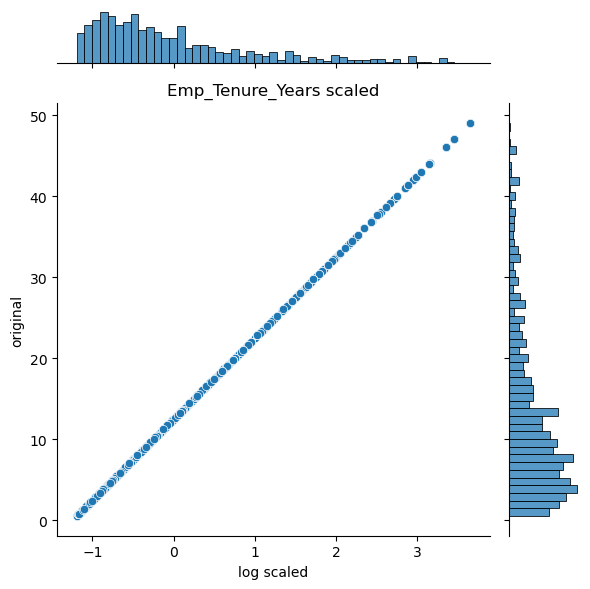

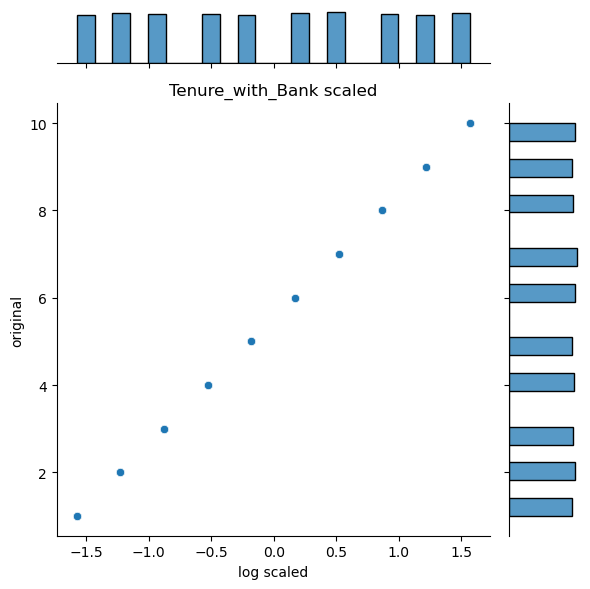

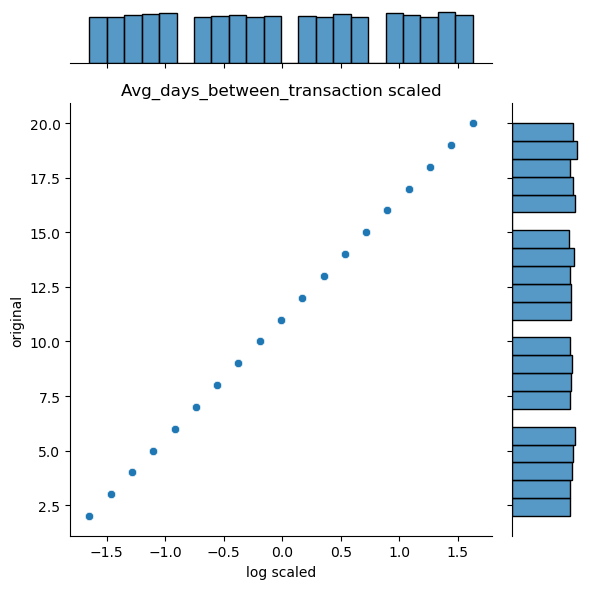

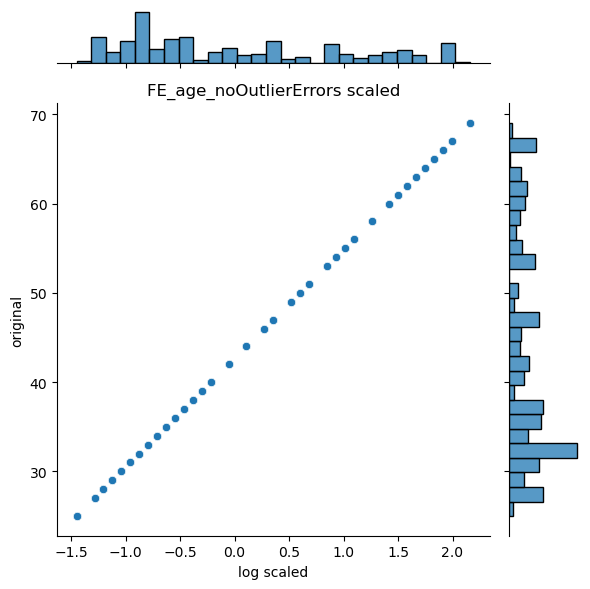

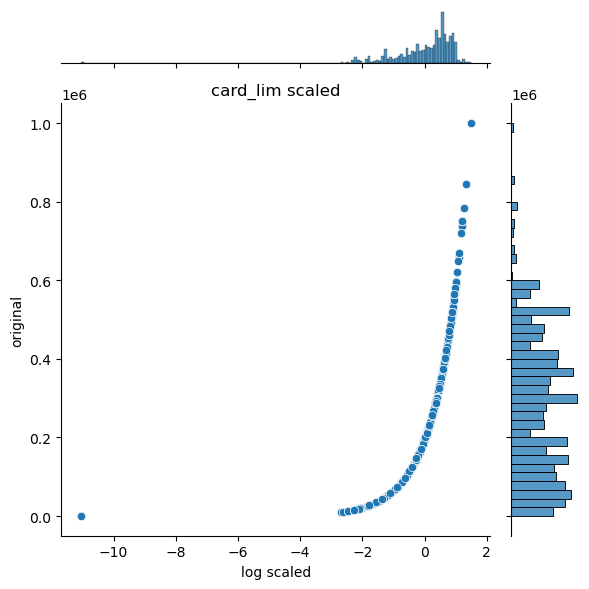

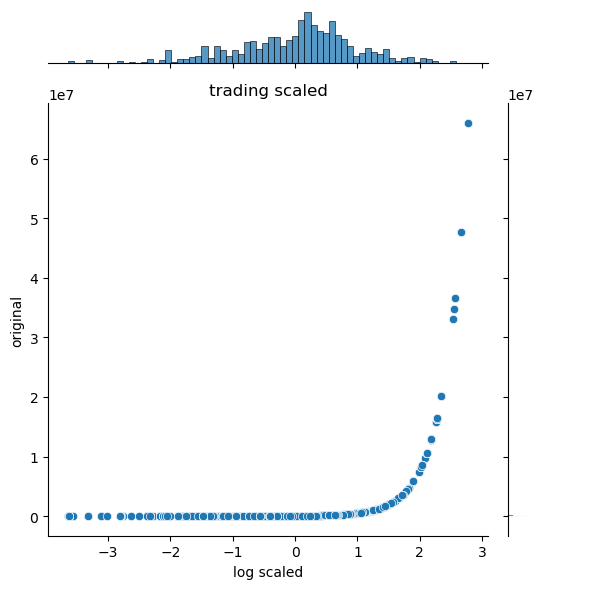

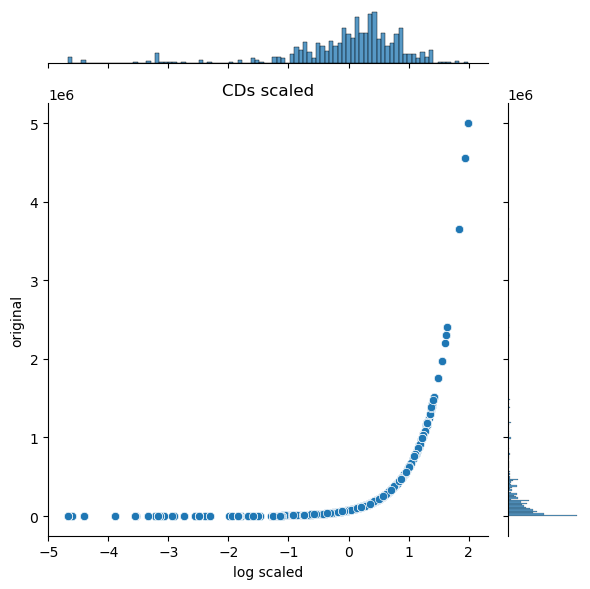

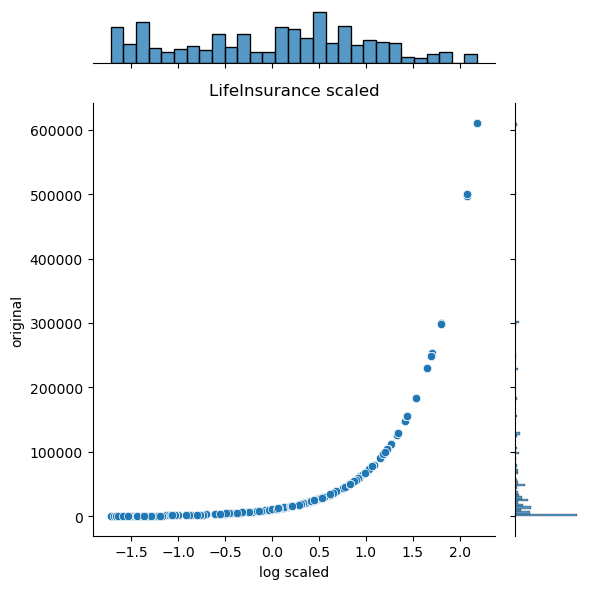

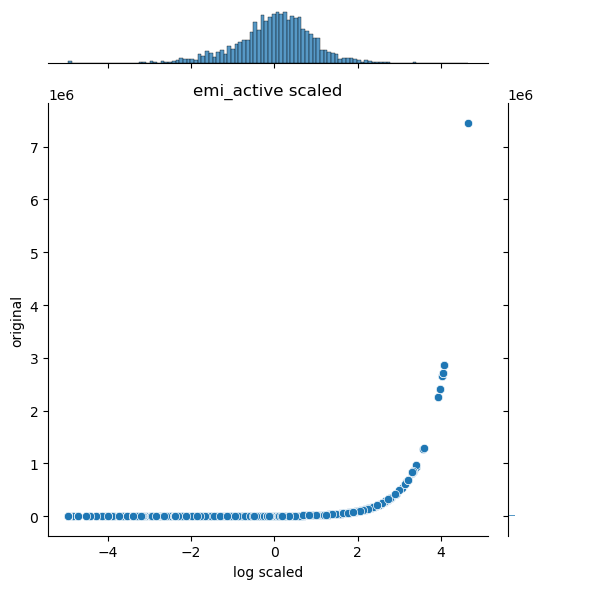

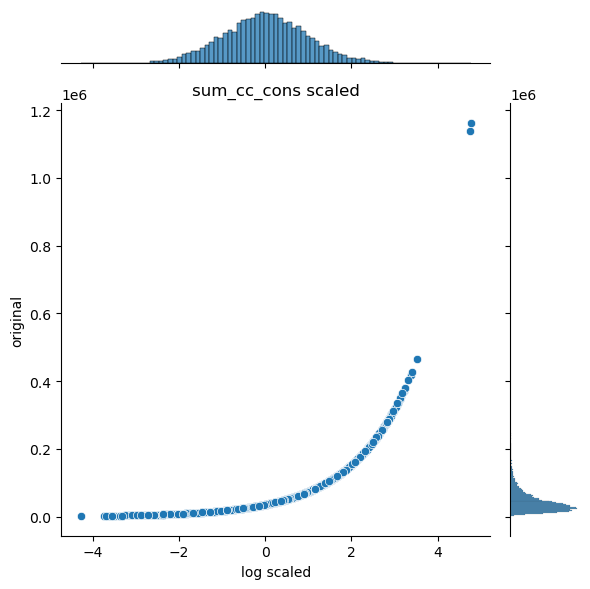

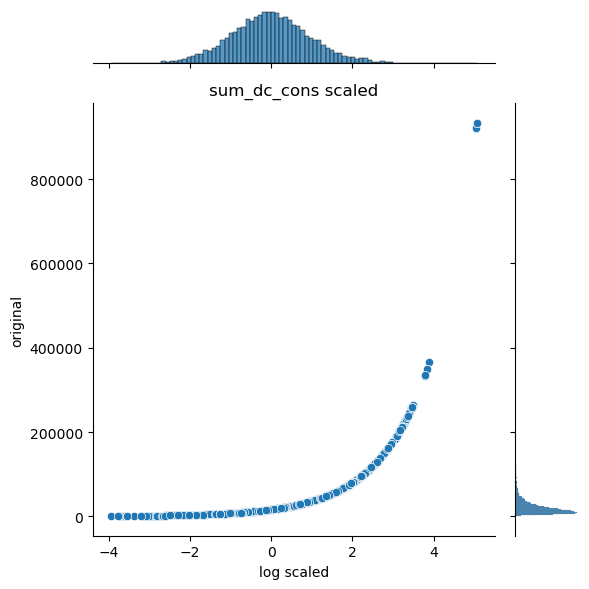

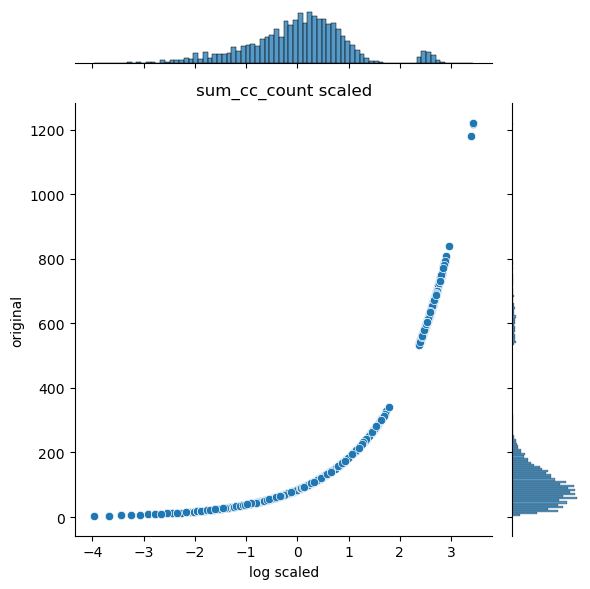

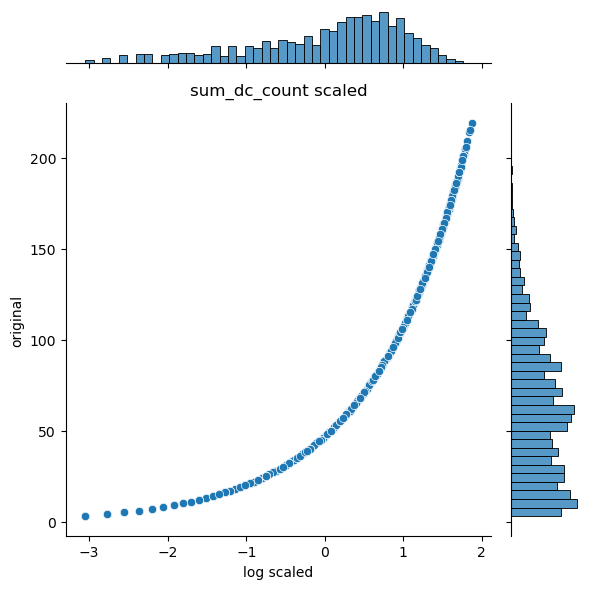

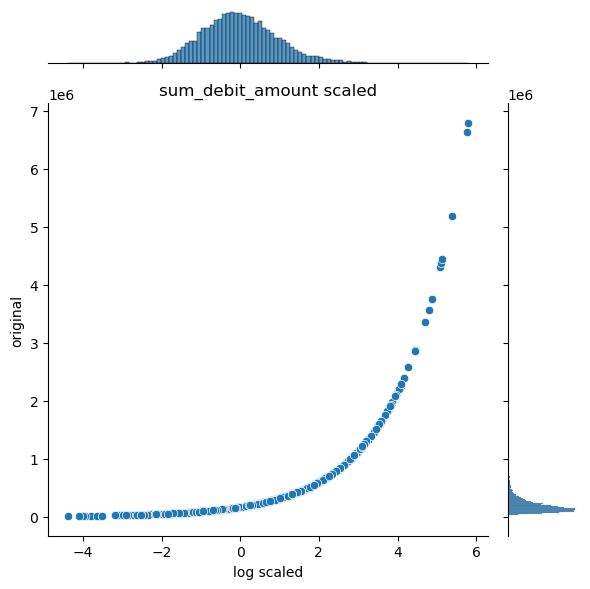

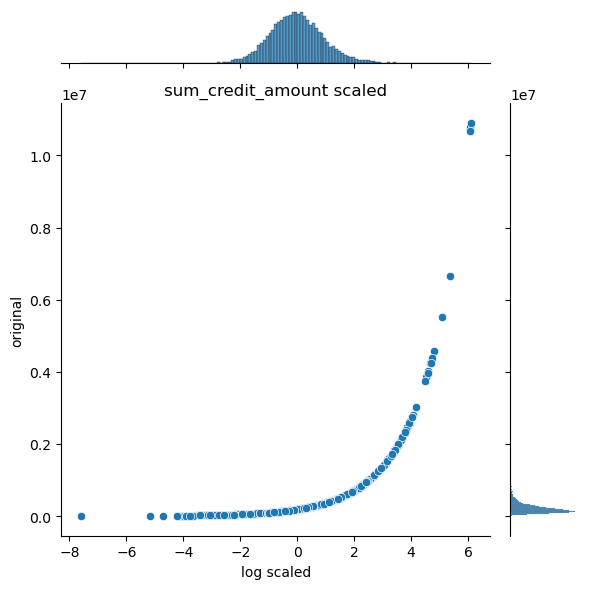

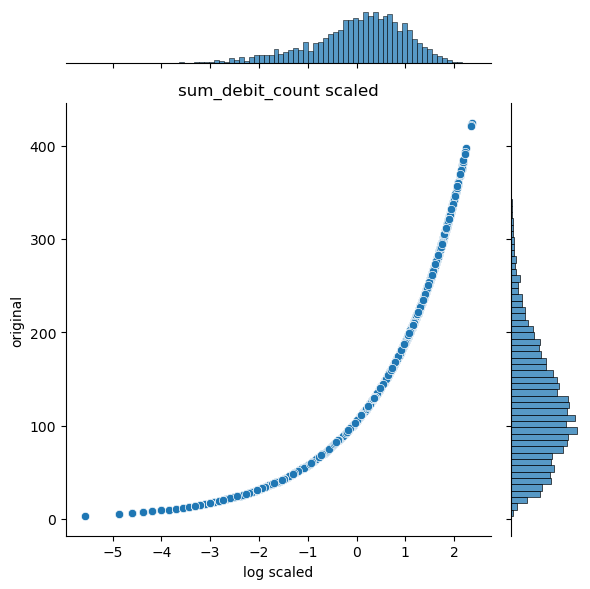

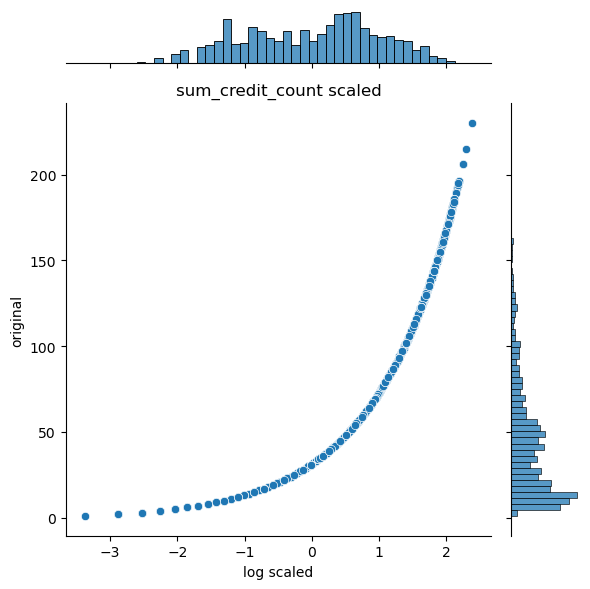

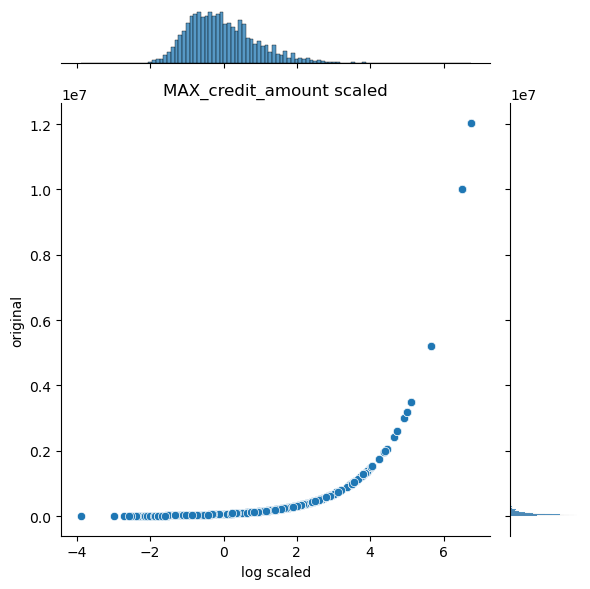

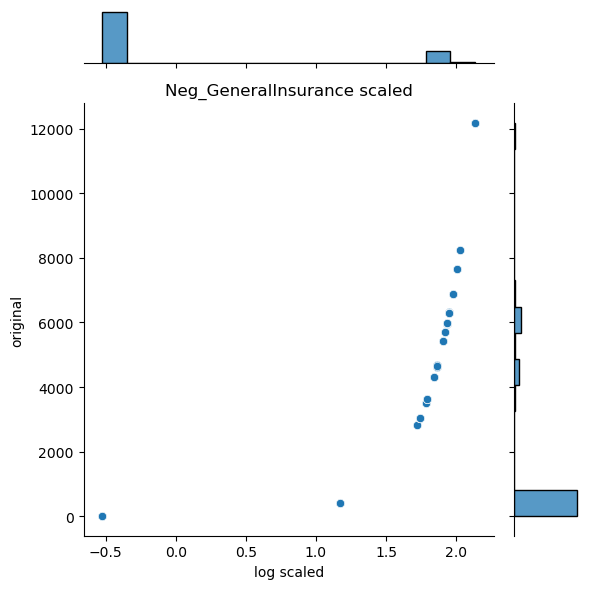

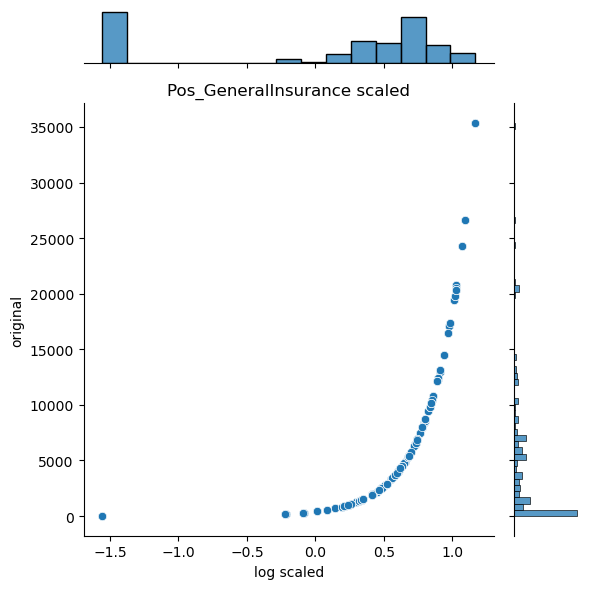

In [10]:
for i, col in enumerate(numeric_cols_toScale):
    sns.jointplot(x=df_Spend_prepared[col],y=df_Spend[col])
    plt.ylabel("original")
    plt.xlabel("log scaled")
    plt.title(f"{col} scaled")
    plt.tight_layout()
    plt.show()

In [11]:
df_Spend_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 14999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14463 non-null  int64  
 1   cc_cons                       14463 non-null  float64
 2   cc_cons_quantileTransformed   14463 non-null  float64
 3   Income                        14463 non-null  object 
 4   region_code                   14463 non-null  float64
 5   NetBanking_Flag               14463 non-null  float64
 6   FE_isSaving                   14463 non-null  float64
 7   FE_isFemale                   14463 non-null  float64
 8   FE_region_id                  14463 non-null  object 
 9   Emp_Tenure_Years              14463 non-null  float64
 10  Tenure_with_Bank              14463 non-null  float64
 11  Avg_days_between_transaction  14463 non-null  float64
 12  FE_age_noOutlierErrors        14463 non-null  float64
 13  card_l

In [12]:
left_to_code = ['Income','FE_region_id']
## drop='first' drops one category which can actually be imputed using the rest..
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, drop='first').set_output(transform='pandas')

coded_income_region = ohe.fit_transform(df_Spend_prepared[left_to_code])

joblib.dump(ohe, 'FE/NB2_OHE_left_to_code.pkl')


df_Spend_prepared.drop(columns = left_to_code, inplace=True)
df_Spend_prepared = pd.concat([df_Spend_prepared,coded_income_region], axis=1)
df_Spend_prepared.to_csv('FE/df_Spend_prepared_scaled.csv', index=False)
df_Spend_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14463 entries, 0 to 14999
Data columns (total 98 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14463 non-null  int64  
 1   cc_cons                       14463 non-null  float64
 2   cc_cons_quantileTransformed   14463 non-null  float64
 3   region_code                   14463 non-null  float64
 4   NetBanking_Flag               14463 non-null  float64
 5   FE_isSaving                   14463 non-null  float64
 6   FE_isFemale                   14463 non-null  float64
 7   Emp_Tenure_Years              14463 non-null  float64
 8   Tenure_with_Bank              14463 non-null  float64
 9   Avg_days_between_transaction  14463 non-null  float64
 10  FE_age_noOutlierErrors        14463 non-null  float64
 11  card_lim                      14463 non-null  float64
 12  trading                       14463 non-null  float64
 13  CDs   